# MPSiS - ćwiczenia 8,9,11: Rozwiązywanie wybranego zadania optymalizacji sieciowej

**Artykuł**: Optimization of IoT Slices in WiFi Enterprise Networks

*Foroutan Fami; Nessrine Hammami; Chuan Pham; Kim-Khoa Nguyen*

**Skład zespołu oraz role**

*   Jan Ściga - Researcher, Leader
*   Marcin Karcz - Dev
*   Wiktor Tekiela - Dev
*   Paweł Bałuszyński - Dev
*   Michał Błaszczyna - Dev


# Skrótowy opis treści artykułu

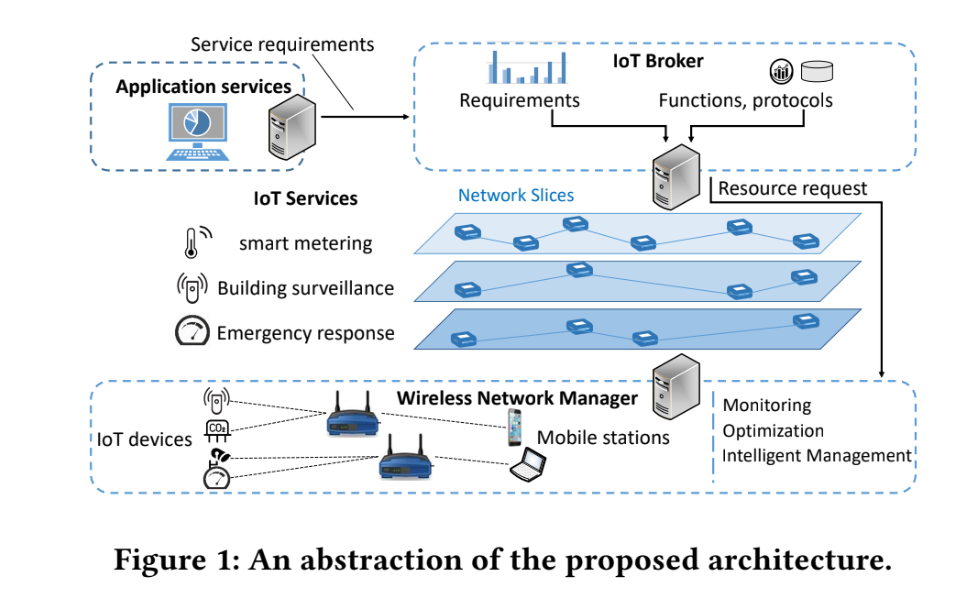

> New slicing solution for WiFi enterprise networks that require no virtualization support

*   Dynamic user association mechanism that takes into account
different IoT requirements.
*   MILP optimization problem that maximizes the total throughput of the network with respect to different IoT requirements

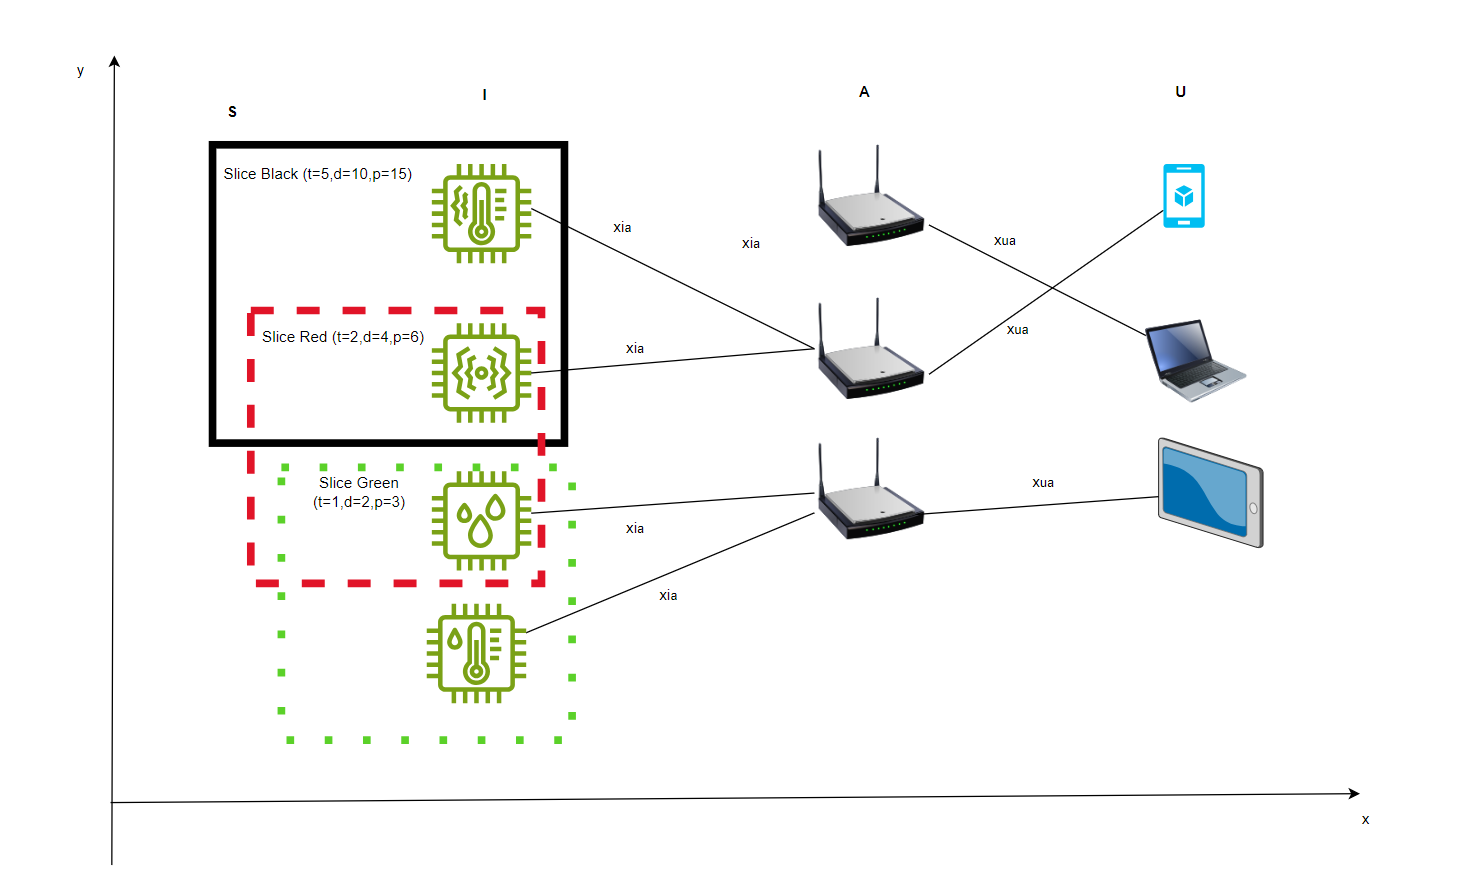

# Stałe

> **A = {𝑎}** set of APs in the network, do którego podłączają się I (urządzenia IoT) oraz U (użytkownicy)

> **I = {𝑖}** - IoT devices set of IoT devices that are going to be assigned to slice S can be defined as I<sub>s</sub>

> **U = {𝑢}** - Mobile users

> **x** (Binary variable) defines the
association of the consumers to the APs (i.e., x<sub>ia</sub> = 1 corresponds
to the association of consumer 𝑖 to the access point 𝑎)

> **S = {𝑠}** - the set of slices define by IoT broker (Each slice has its
specific requirements (throughput, delay, etc) planed based on the
applications and services that are using the slice.)

> **tuple (𝜁 , 𝜂, 𝜗)** of requirements for each slice (slice
profile) based on required throughput, delay, and PER
        

## Stałe wyliczane dynamicznie

> Przepływność, opóźnienie, straty danego czujnika są równe maksymalnej przepływności, minimalnej opóźnieniu i stracie wymaganej przez slice'y zawierające dane urządzenie

*   <font size="+2">**Throughput requirement:**  𝜁𝑖 = max(𝜁𝑠𝑖) $s \in S$, $∀𝑖 \in I_s$</font>
*   <font size="+2">**Delay requirement**   𝜂𝑖 = min(𝜂𝑠𝑖) $s \in S$, $∀𝑖 \in I_s$</font>
*   <font size="+2">**PLR requirement**   𝜗𝑖 = min(𝜗𝑠𝑖) $s \in S$, $∀𝑖 \in I_s$</font>


## Physical constraints
> Data rate of device i while connected to AP a (𝛽 = 20𝑀𝐻𝑧)

 <center>
 <font size="+3">𝑑𝑟<sub>𝑖𝑎</sub> = 𝛽 × log2 (1 + 𝛾<sub>𝑖𝑎</sub>)</font>
</center>


## SNR (𝛾<sub>𝑖𝑎</sub>)
> Signal To Noise ratio calculation based on interferences and magnitude calculation   

 <center>
 <font size="+3">
 𝛾<sub>𝑖𝑎</sub> = 𝑝𝑖𝑎 / (𝑁0 + 𝐼𝑖𝑎) , ∀𝑎 ∈ A, ∀𝑖 ∈ I
  </font>
</center>

## Throughput, Delay, Packet Loss Calculation
> Real throughput, delay and loss calculation based on already calculated rate
and number of connections

<center>
<font size="+3">
𝜏𝑖𝑎, 𝑑𝑖𝑎, 𝑝𝑟𝑖𝑎 = 𝜓 (𝑛𝑐𝑎, 𝑑𝑟𝑖𝑎)
</font>

</center>

# Integrity constarints

### W sieci istnieją wymagania zwiazane z jej integralnością

> Wszystkie sensory, użytkownicy sa podłączeni do dokładnie jednego AP, które mają ograniczoną pojemność

<font size="+2">
$$
\begin{align*}
&\sum_{𝑖 \in I} \sum_{𝑎 \in A} 𝑥_{𝑖𝑎} = |I| \\
&\sum_{𝑎 \in A} 𝑥_{𝑖𝑎} = 1, \quad \forall 𝑖 \in I \\
&\sum_{𝑢 \in U} 𝑥_{𝑢𝑎} = 1, \quad \forall 𝑢 \in U \\
&\sum_{𝑖 \in I} 𝜏_{𝑖𝑎} \times 𝑥_{𝑖𝑎} \leq 𝑐_{𝑎}, \quad \forall 𝑎 \in A
\end{align*}
$$
</font>

# Iot slicing constraints

### Łącza radiowe powinny spełniać wymagania zdefiniowane przez slice'y (dotyczące przepływności, opóźnień i strat)

<font size="+2">
$$
\begin{align*}
&\sum_{𝑎 \in A} 𝜏_{𝑖𝑎} \times 𝑥_{𝑖𝑎} \geq 𝜁_{𝑖}, \quad \forall 𝑖 \in I \\
&\sum_{𝑎 \in A} 𝑑_{𝑖𝑎} \times 𝑥_{𝑖𝑎} \leq 𝜂_{𝑖}, \quad \forall 𝑖 \in I \\
&\sum_{𝑎 \in A} 𝑝_{𝑟𝑖𝑎} \times 𝑥_{𝑖𝑎} \leq 𝜗_{𝑖}, \quad \forall 𝑖 \in I \\
\end{align*}
$$
</font>

# Funkcja Celu

> Maksymalizujemy przepływność na wybranych przez optymalizator łączach między AP i sensorami oraz AP i użytkownikami

<font size="+2">
$$
\max \left( \sum_{{i \in I}} \sum_{{a \in A}} \tau_{{i a}} \times x_{{i a}} + \sum_{{u \in U}} \sum_{{a \in A}} \tau_{{u a}} \times x_{{u a}} \right)
$$
</font>

#Importy

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pprint
import random
import math

from math import sin, cos
! pip install pulp

import pulp as plp

thrpt_results = {}

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 50.7 MB/s eta 0:00:00


#Generowanie danych

In [ ]:
  # AP, IoT Devices, Mobile Users

ap_data = []
iot_devices = []
mobile_users = []
device_types = ['Camera', 'TemepartureSensor', 'PressureSensor', 'AirQualitySensor']

for i in range(0,10):
    ap_data.append({
        'name': 'AP{number}'.format(number = i),
        'capacity': random.randint(100000000000, 5000000000000000000),
        'location': {
            'x': random.uniform(40,45), # round(5 + 30 * random.uniform(0.1, 1.0) * cos(random.uniform(0, 2 * 3.1416))), # 5 - centrum środka, w radiusie 30 wokół
            'y': round(100 * (i + 1) / 11)  # Vary y-coordinates evenly between 0 and 100 round(5 + 30 * random.uniform(0.1, 1.0) * sin(random.uniform(0, 2 * 3.1416)))
        }
    })

for i in range(0,6):
    iot_devices.append({
        'name': 'IoT_Device{number}'.format(number = i),
        'location': {
            'x': random.uniform(0, 30),
            'y': random.uniform(0, 100)
        },
        'device_type': device_types[random.randint(0, len(device_types)-1)]
    })

def getUserLocation(user_name):
    for user in mobile_users:
        if user['name'] == user_name:
            return user['location']['x'], user['location']['y']

def getDeviceLocation(device_name):
    for device in iot_devices:
        if device['name'] == device_name:
            return device['location']['x'], device['location']['y']

def getApLocation(ap_name):
    for ap in ap_data:
        if ap['name'] == ap_name:
            return ap['location']['x'], ap['location']['y']

In [ ]:
# Funkcja generująca slice'y

slices_desc = [('SmartHome', {'Camera': 5, 'TemepartureSensor': 3}),
    ('SmartHome2', {'PressureSensor': 2, 'AirQualitySensor': 3}),
    ('AGHSlice', {'TemepartureSensor': 3, 'PressureSensor': 3}),
    ('ResearchSlice', {'TemepartureSensor': 3, 'PressureSensor': 3, 'AirQualitySensor': 5}),
    ('CityMonitoring', {'Camera': 10})]

def generate_slices(iot_devices:list, throughput_range:tuple, delay_range:tuple, iot_range:tuple,seed:int = None):
    import random
    if seed is not None:
        random.seed(seed)
    slices = {}
    i = 1
    tmp = iot_devices.copy()
    while len(tmp) != 0:
      curr_slice_devices = random.randint(iot_range[0], iot_range[1])
      throughput = random.randint(throughput_range[0], throughput_range[1])
      delay = random.randint(delay_range[0], delay_range[1])
      per = random.random()
      devices = []
      for _ in range(curr_slice_devices):
        max = len(tmp) - 1
        if max == 0:
          j = 0
        elif max == -1:
          break
        else:
          j = random.randint(0, len(tmp)-1)
        devices.append(tmp[j])
        tmp.pop(j)
      slices[f'Slice {i}'] = (throughput, delay, per, devices)
      i+=1
    return slices


slices = generate_slices(iot_devices, (0, 10), (10, 20), (2,5))
pprint.pprint((slices))

for i in range(0,16):
    mobile_users.append({
        'name': 'Mobile_users{number}'.format(number = i),
        'location': {
            'x': random.randint(50, 100),
            'y': random.randint(0, 100)
        },
        'required_slice' : random.choice(slices_desc)
    })

{'Slice 1': (10,
             11,
             0.7264849551225551,
             [{'device_type': 'Camera',
               'location': {'x': 0.11671514640684055, 'y': 92.33057801611652},
               'name': 'IoT_Device2'},
              {'device_type': 'AirQualitySensor',
               'location': {'x': 24.407196357532122, 'y': 35.66834719848146},
               'name': 'IoT_Device3'},
              {'device_type': 'Camera',
               'location': {'x': 10.149822692604221, 'y': 43.265735541158044},
               'name': 'IoT_Device4'},
              {'device_type': 'TemepartureSensor',
               'location': {'x': 13.681817002307083, 'y': 76.59357495309445},
               'name': 'IoT_Device5'}]),
 'Slice 2': (7,
             18,
             0.8523951643473314,
             [{'device_type': 'PressureSensor',
               'location': {'x': 16.6685987717792, 'y': 85.35972633840689},
               'name': 'IoT_Device0'},
              {'device_type': 'AirQualitySensor',
 

In [ ]:
# Funkcja generująca zmienne decyzyjne: łącza user<->AP (xua) oraz device<->AP (xia)

def create_pulp_variables(apki, uzytkownicy, iot_devices):
    xua = plp.LpVariable.dicts("Link_AP_User", [(ap['name'], user['name']) for ap in apki for user in uzytkownicy], 0, 1, cat=plp.LpBinary)
    xia = plp.LpVariable.dicts("Link_AP_IoT", [(ap['name'], device['name']) for ap in apki for device in iot_devices], 0, 1, cat=plp.LpBinary)
    return xua, xia

In [ ]:
# Funkcje związane z obliczeniem parametrów łączy (thrpt, delay, PLR)

freq = 2.4
c = 299792458
L = 0.5
n = 1.5
beta = 20e6

def calculate_distance(loc_a, loc_b):
  return math.sqrt(((loc_a['x'] - loc_b['x'])*(loc_a['x']-loc_b['x'])) + ((loc_a['y'] - loc_b['y'])*(loc_a['y']-loc_b['y'])))

def calculate_IL(loc_a, loc_b):
  return L + 10*n*math.log(calculate_distance(loc_a, loc_b), 10)

def calculate_FSPL(loc_a, loc_b):
  return 20*math.log(calculate_distance(loc_a, loc_b), 10) + 20*math.log(freq, 10) + 32.44

def calculate_gamma_ia(pia, xia, n0, iia):
  return (pia) / (n0 + iia)

def calculate_data_rate(pia, xia, n0, iia):
  return beta * math.log(1 + calculate_gamma_ia(pia, xia, n0, iia), 2)

# Funkcja zwracająca parametry łącza na podstawie osiąganego data rate'u
def psi(d_ria):
    throughput = d_ria
    delay = 1 / throughput
    packet_loss_ratio = 1 / d_ria

    return throughput, delay, packet_loss_ratio

In [ ]:
# PHYSICAL CONSTRAINTS FOR DEVICES

xua, xia = create_pulp_variables(ap_data, mobile_users, iot_devices)
data_rates={}
throughputs = {}
delays={}
plrs={}

for ap in ap_data:
  for device in iot_devices:
      if ap["location"]["x"] != device["location"]["x"] or ap["location"]["y"] != device["location"]["y"]:
        gamma = calculate_gamma_ia(calculate_FSPL(ap["location"],device["location"]),xia[(ap['name'], device['name'])],n,calculate_IL(ap["location"],device["location"]))
        data_rates[ap['name'], device['name']] = beta * math.log2(1 + abs(gamma))
      else:
        print("LOCATION ERROR")
        print(ap,device)

for ap in ap_data:
  for device in iot_devices:
    throughputs[ap['name'], device['name']], delays[ap['name'], device['name']], plrs[ap['name'], device['name']] = psi(data_rates[ap['name'], device['name']])

In [ ]:
# PHYSICAL CONSTRAINTS FOR USERS

for ap in ap_data:
  for user in mobile_users:
      if ap["location"]["x"] != user["location"]["x"] or ap["location"]["y"] != user["location"]["y"]:
        gamma = calculate_gamma_ia(calculate_FSPL(ap["location"],user["location"]),xua[(ap['name'], user['name'])],n,calculate_IL(ap["location"],user["location"]))
        data_rates[ap['name'], user['name']] = beta * math.log2(1 + abs(gamma))
      else:
        print("LOCATION ERROR")
        print(ap,user)

for ap in ap_data:
  for user in mobile_users:
    throughputs[ap['name'], user['name']], delays[ap['name'], user['name']], plrs[ap['name'], user['name']] = psi(data_rates[ap['name'], user['name']])

In [ ]:
# Stałe wyliczane dynamiczne

def device_in_slice_lookup(given_device):
  thrpts = []
  delays = []
  plrs = []
  for slice_content in slices.values():
    for device in slice_content[3]:
      if given_device == device["name"]:
        thrpts.append(slice_content[0])
        delays.append(slice_content[1])
        plrs.append(slice_content[2])
  return {"thrpt": max(thrpts), "delay": min(delays), "plr": min(plrs)}

In [ ]:
iot_prob = plp.LpProblem("Max_Iot_Problem", sense=plp.LpMaximize)

# IoT Slicing Constraints
for ap in ap_data:
  for device in iot_devices:
    iot_prob +=  throughputs[ap['name'], device['name']] * xia[ap['name'], device['name']] >= device_in_slice_lookup(device["name"])["thrpt"]
    iot_prob +=  delays[ap['name'], device['name']] * xia[ap['name'], device['name']] <= device_in_slice_lookup(device["name"])["delay"]
    iot_prob +=  plrs[ap['name'], device['name']] * xia[ap['name'], device['name']] <= device_in_slice_lookup(device["name"])["plr"]

# Integrity Constraints
iot_prob += plp.lpSum(xia[ap['name'], device['name']] for ap in ap_data for device in iot_devices) == len(iot_devices)

for i in iot_devices:
  iot_prob += plp.lpSum(xia[ap['name'],i['name']] for ap in ap_data) == 1
for u in mobile_users:
  iot_prob += plp.lpSum(xua[ap['name'],u['name']] for ap in ap_data) == 1
for ap in ap_data:
  iot_prob += plp.lpSum(throughputs[ap['name'], device['name']]*xia[ap['name'],device['name']] for device in iot_devices) <= ap["capacity"]

In [ ]:
# Funkcja celu
iot_prob += plp.lpSum(throughputs[ap['name'], device['name']] * xia[ap['name'], device['name']] for device in iot_devices for ap in ap_data) + \
plp.lpSum(throughputs[ap['name'], user['name']] * xua[ap['name'], user['name']] for user in mobile_users for ap in ap_data)

iot_prob.solve()

-1


################## IOT_RESULTS SUMMARY #####################
WARTOŚĆ FUNKCJI CELU:  870506288.6738422

################### IOT ASSOCIATION RESULTS #######################



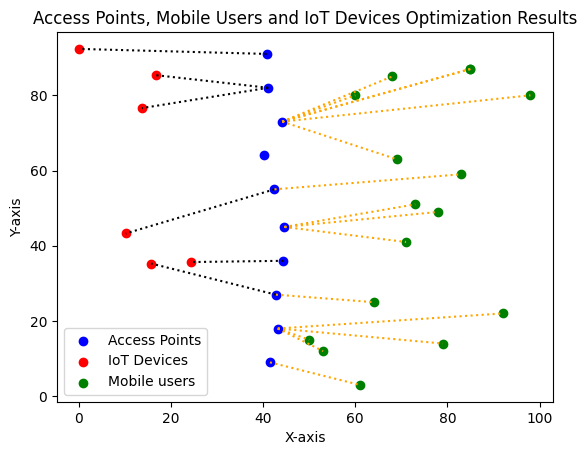


####################### DEVICE UTILIZATION ###############################



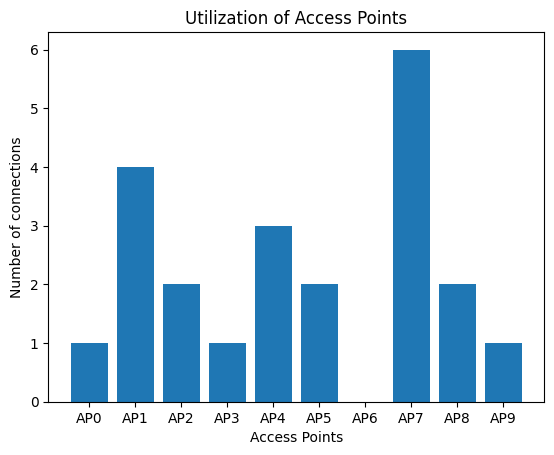


####################### THROUGHPUT ###############################



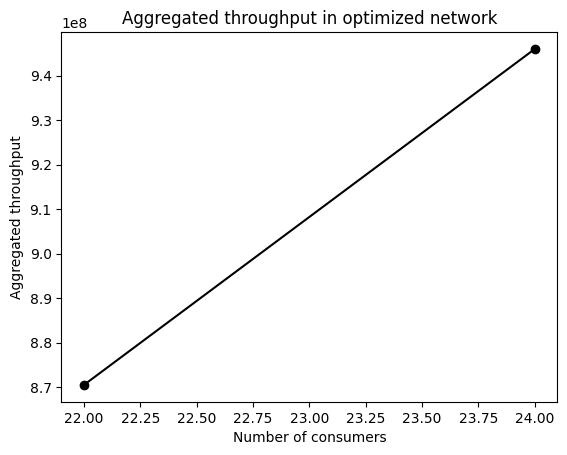

In [ ]:
# Wizualizacja wyników

from re import U
import re

# Define a regular expression pattern
pattern_device = r"Link_AP_IoT_\('([^']+)',_'([^']+)'\)"
pattern_user = r"Link_AP_User_\('([^']+)',_'([^']+)'\)"

# Function to extract elements from the list
def extract_elements(string,pattern):
    match = re.match(pattern, string)
    if match:
        return match.groups()
    else:
        return None

print("")
print("################## IOT_RESULTS SUMMARY #####################")
print("WARTOŚĆ FUNKCJI CELU: ",plp.value(iot_prob.objective))
print("")

utilized_devices = {a["name"]: 0 for a in ap_data}

for variable in iot_prob.variables():
      if variable.varValue > 0.01:
        #print(f'{variable.name}* = {variable.varValue}')
        #print(variable.varValue)

        if "IoT_Device" in variable.name:
           ap, iot_device = extract_elements(variable.name,pattern_device)
           plt.plot([getApLocation(ap)[0] , getDeviceLocation(iot_device)[0]], [getApLocation(ap)[1], getDeviceLocation(iot_device)[1]], 'black', linestyle='dotted')
           utilized_devices[ap] += 1

        if "Mobile" in variable.name:
            ap, user = extract_elements(variable.name,pattern_user)
            plt.plot([getApLocation(ap)[0] , getUserLocation(user)[0]], [getApLocation(ap)[1], getUserLocation(user)[1]], 'orange', linestyle='dotted')
            utilized_devices[ap] += 1

print("################### IOT ASSOCIATION RESULTS #######################")
print("")

ap_x = [ap['location']['x'] for ap in ap_data]
ap_y = [ap['location']['y'] for ap in ap_data]

iot_x = [iot['location']['x'] for iot in iot_devices]
iot_y = [iot['location']['y'] for iot in iot_devices]

u_x = [u['location']['x'] for u in mobile_users]
u_y = [u['location']['y'] for u in mobile_users]

# Plot the locations
plt.scatter(ap_x, ap_y, label='Access Points', color='blue')
plt.scatter(iot_x, iot_y, label='IoT Devices', color='red')
plt.scatter(u_x, u_y, label='Mobile users', color='green')

# Add labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Access Points, Mobile Users and IoT Devices Optimization Results')
plt.legend()

# Show the plot
plt.show()

# Extracting keys and values
ap_names = list(utilized_devices.keys())
ap_values = list(utilized_devices.values())

print()
print("####################### DEVICE UTILIZATION ###############################")
print()

# Plotting the data
plt.bar(range(len(utilized_devices)), ap_values, tick_label=ap_names)
plt.xlabel('Access Points')
plt.ylabel('Number of connections')
plt.title('Utilization of Access Points')
plt.show()

print()
print("####################### THROUGHPUT ###############################")
print()


thrpt_results[len(iot_devices)+len(mobile_users)] = plp.value(iot_prob.objective)

ap_names = list(thrpt_results.keys())
ap_values = list(thrpt_results.values())

plt.plot(ap_names, ap_values,"o-",color='black')
plt.xlabel('Number of consumers')
plt.ylabel('Aggregated throughput')
plt.title('Aggregated throughput in optimized network')
plt.show()